In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
df1=pd.read_csv("bike.csv")
df1

,Date,Season,Month,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1/2/2011,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1/3/2011,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
##new dataframe with date in datetime format 

df=df1[['Date','Total Users']]
df['Date']=pd.to_datetime(df['Date'])
df

C:\Users\rodea\AppData\Local\Temp\ipykernel_20644\1998909888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


,Date,Total Users
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         731 non-null    datetime64[ns]
 1   Total Users  731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [5]:
df.isnull().sum()


Date           0
Total Users    0
dtype: int64

In [6]:
df.set_index('Date',inplace=True)
df

,Total Users
Date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


<AxesSubplot:xlabel='Date'>

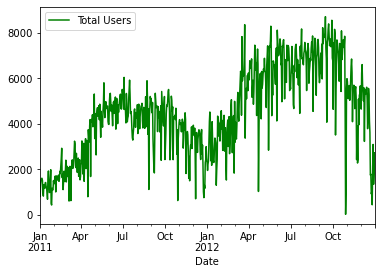

In [7]:
df.plot(color='green')


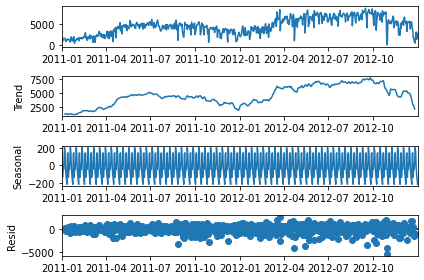

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data= seasonal_decompose(df,model="additive", period=12)
decompose_data.plot();

# Check Stationarity


In [9]:
adf=adfuller(df,autolag='AIC')
adf

(-1.8774481444374314,
 0.3427434403392186,
 13,
 717,
 {'1%': -3.439503230053971,
  '5%': -2.8655794463678346,
  '10%': -2.5689210707289982},
 11740.390931163352)

In [10]:
##p value must be less than 0.05

if adf[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")

Null Hypothesis--------------> Data Not Stationary


<AxesSubplot:xlabel='Date'>

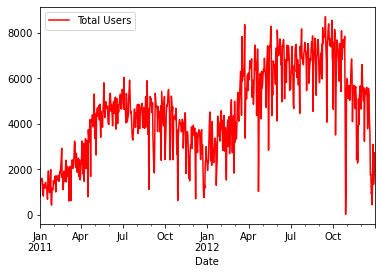

In [11]:
df.plot(color='red')


In [12]:
## Log Transformation 
df_log=np.log(df)
df_log


,Total Users
Date,
2011-01-01,6.892642
2011-01-02,6.685861
2011-01-03,7.207119
2011-01-04,7.353722
2011-01-05,7.377759
...,...
2012-12-27,7.656337
2012-12-28,8.037543
2012-12-29,7.201171


In [13]:
adf_log=adfuller(df_log,autolag='AIC')
if adf[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")

Null Hypothesis--------------> Data Not Stationary


In [14]:
#Shift Difference
df_new=df - df.shift(1)
df_new


,Total Users
Date,
2011-01-01,NaN
2011-01-02,-184.0
2011-01-03,548.0
2011-01-04,213.0
2011-01-05,38.0
...,...
2012-12-27,1673.0
2012-12-28,981.0
2012-12-29,-1754.0


In [15]:
df_new.dropna(inplace=True)
adf_shift=adfuller(df_new)
if adf_shift[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")


Rejecting Null Hypothesis--------------> Data is Stationary


<AxesSubplot:xlabel='Date'>

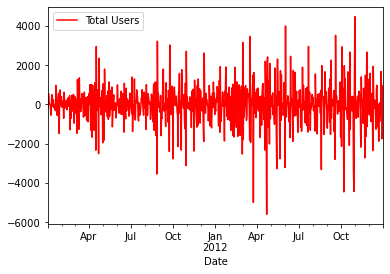

In [16]:
df_new.plot(color='red')


# ACF and PACF Plots

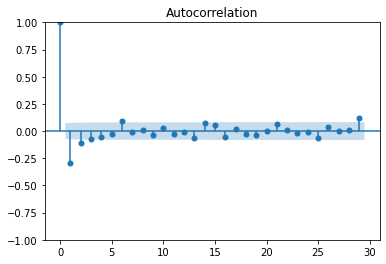

In [17]:
plot_acf(df_new)
plt.show()

C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


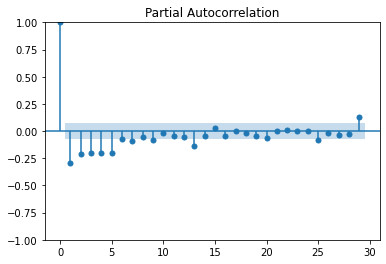

In [18]:
plot_pacf(df_new)
plt.show()

# Train- Test Split

In [19]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_new,test_size=0.2,shuffle=False)


In [20]:
train.shape


(584, 1)

In [21]:
test.shape


(146, 1)

# AR Model 

In [22]:
from statsmodels.tsa.ar_model import AutoReg

In [23]:
model_ar=AutoReg(train,lags=1)
model_ar_fit=model_ar.fit()


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
predict_ar=model_ar_fit.predict(start=len(train),end=len(train)+145)
predict_ar


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2012-08-08   -70.776179
2012-08-09    37.703537
2012-08-10     2.127067
2012-08-11    13.794550
2012-08-12     9.968140
                ...    
2012-12-27    10.913119
2012-12-28    10.913119
2012-12-29    10.913119
2012-12-30    10.913119
2012-12-31    10.913119
Freq: D, Length: 146, dtype: float64

In [25]:
##Acuuracy 
from sklearn.metrics import mean_squared_error
mse_ar=np.sqrt(mean_squared_error(test,predict_ar))
mse_ar


1286.9172984990844

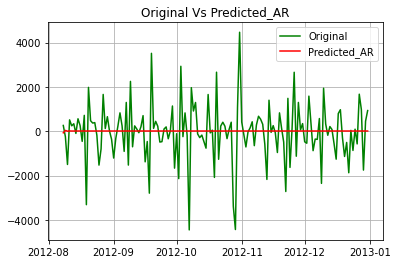

In [26]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_ar,label='Predicted_AR',color='red')
plt.legend()
plt.title("Original Vs Predicted_AR")
plt.grid()
plt.show()

# MA Model 

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model_ma=ARIMA(train,order=(0,0,1))
model_ma_fit=model_ma.fit()


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
predict_ma=model_ma_fit.predict(start=len(train),end=len(train)+145)
predict_ma


2012-08-08   -325.335517
2012-08-09      9.906827
2012-08-10      9.906827
2012-08-11      9.906827
2012-08-12      9.906827
                 ...    
2012-12-27      9.906827
2012-12-28      9.906827
2012-12-29      9.906827
2012-12-30      9.906827
2012-12-31      9.906827
Freq: D, Name: predicted_mean, Length: 146, dtype: float64

In [29]:
mse_ma=np.sqrt(mean_squared_error(test,predict_ma))
mse_ma

1287.5440516440617

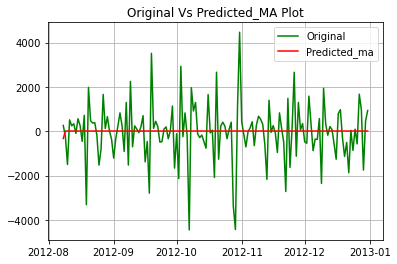

In [30]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_ma,label='Predicted_ma',color='red')
plt.title("Original Vs Predicted_MA Plot")
plt.grid()
plt.legend()
plt.show()

# ARIMA MODEL 

In [31]:
import itertools
p=d=q=range(0,3)
pdq=itertools.product(p,d,q)


In [32]:
for i in pdq:
    try:
        model=ARIMA(train,order=i)
        model_fit=model.fit()
        print(i,model_fit.aic)
    except:
        continue

C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(0, 0, 0) 9731.13357998461


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(0, 0, 1) 9568.82392700087


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(0, 0, 2) 9534.460808386313
(0, 1, 0) 10282.868206041763


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(0, 1, 1) 9721.432813523666


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 1, 2) 9562.19987059394
(0, 2, 0) 10935.475886175467


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(0, 2, 1) 10273.565682469649


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(0, 2, 2) 9721.90622186596
(1, 0, 0) 9666.77391797779


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(1, 0, 1) 9534.372754802289


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(1, 0, 2) 9535.496924153176
(1, 1, 0) 10045.882718109424


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(1, 1, 1) 9657.500935148733


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 1, 2) 9527.648799402623
(1, 2, 0) 10548.57860980536


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(1, 2, 1) 10037.505298971319


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 2, 2) 9658.54522407326
(2, 0, 0) 9630.502307892519


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(2, 0, 1) 9535.26622162803


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D w

(2, 0, 2) 9534.307956459204
(2, 1, 0) 9923.886938138345


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(2, 1, 1) 9621.70863332918


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2) 9661.482421692617
(2, 2, 0) 10329.970926006503


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(2, 2, 1) 9916.170213400463


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 2, 2) 9623.992061999947


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
## Now we know that model with the least AIC value is the best one , so here the order will be (2,0,2)

In [34]:
model_arima=ARIMA(train,order=(1,1,2))
model_arima_fit=model_arima.fit()
predict_arima=model_arima_fit.forecast(146)
predict_arima


C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2012-08-08   -229.121489
2012-08-09    -61.244858
2012-08-10    -11.556071
2012-08-11      3.151013
2012-08-12      7.504073
                 ...    
2012-12-27      9.334196
2012-12-28      9.334196
2012-12-29      9.334196
2012-12-30      9.334196
2012-12-31      9.334196
Freq: D, Name: predicted_mean, Length: 146, dtype: float64

In [35]:
mse_arima=np.sqrt(mean_squared_error(test,predict_arima))
mse_arima


1287.0196170481854

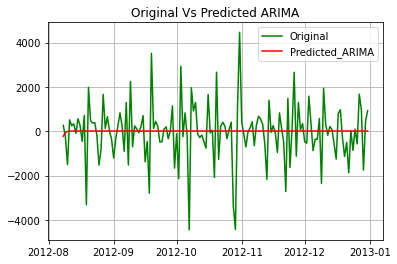

In [36]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_arima,label='Predicted_ARIMA',color='red')
plt.legend()
plt.title("Original Vs Predicted ARIMA")
plt.grid()
plt.show()

# SARIMA

In [36]:
model_sarima=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
model_sarima_fit=model_sarima.fit()
predict_sarima=model_sarima_fit.forecast(146)
predict_sarima




C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rodea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2012-08-08   -346.333045
2012-08-09   -131.325046
2012-08-10    320.470153
2012-08-11     12.589080
2012-08-12   -354.111333
                 ...    
2012-12-27   -124.238064
2012-12-28    -17.327177
2012-12-29    -55.348144
2012-12-30    -56.216799
2012-12-31    -63.095742
Freq: D, Name: predicted_mean, Length: 146, dtype: float64

In [37]:
mse_sarima=np.sqrt(mean_squared_error(predict_sarima,test))
mse_sarima


1308.8498343764168

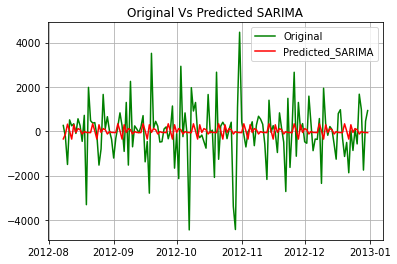

In [38]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_sarima,label='Predicted_SARIMA',color='red')
plt.legend()
plt.title("Original Vs Predicted SARIMA")
plt.grid()
plt.show()

# Model Comparison

AR MSE: 1286.9172984990844
MA MSE: 1287.5440516440617
ARIMA MSE: 1287.0196170481854
SARIMA MSE: 1308.8498343764168


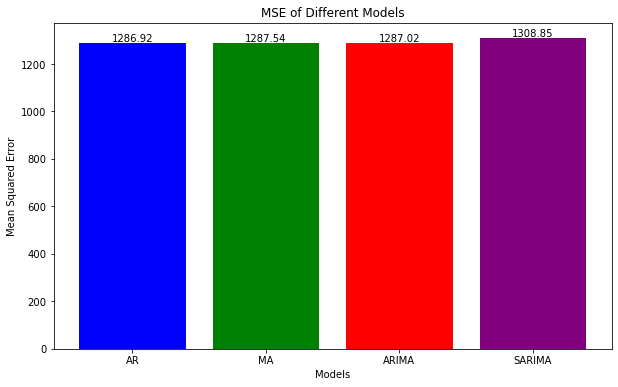

In [40]:
import matplotlib.pyplot as plt

mse_values = {
    'AR': mse_ar,  
    'MA': mse_ma,  
    'ARIMA': mse_arima,  
    'SARIMA': mse_sarima  
}

# For a simple text comparison:
for model, mse in mse_values.items():
    print(f"{model} MSE: {mse}")


#bar plot
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green', 'red', 'purple','yellow'])

plt.title('MSE of Different Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')

#text 
for i, (model, mse) in enumerate(mse_values.items()):
    plt.text(i, mse, f'{mse:.2f}', ha = 'center', va = 'bottom')

plt.show()
